<h1> Równania różniczkowe zwyczajne <h1>
<h3>Wprowadzenie do wszystkich zadań</h3>
    
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 1</h3>

Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

<h3>Zad 2</h3>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace
cialo niebieskie z pewną (zadawana przez uzytkownika) prędkością 
poczatkową. 

http://www.artcompsci.org/msa/web/vol_1/v1_web/v1_web.html

Rozszerzenie: rozszerz symulację dla układu trzech ciał poruszających się w polu grawitacyjnym, 

* https://www.kwantowo.pl/2019/09/08/zagadka-ruchu-trzech-cial/

* https://arxiv.org/pdf/1508.02312.pdf

* https://www.wired.com/2016/06/way-solve-three-body-problem/

<h3>Zad3</h3>

Zasymuluj model drapieżnik - ofiara 

x(t)- populacja drapieżników

y(t) -populacja ofiar 

a - współczynnik śmierci drapieżników z powodu braku
ofiar 

b- współczynnik narodzin ofiar, gdy nie ma drapieżników

c- efektywność z jaką drapieżnik wykorzystuje 
energię pozyskaną ze zjedzenia
ofiar  $0.0<c=<1.0$ 

d- efektywność uśmiercania ofiar przez drapieżników

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

Rozszerzenie:
Zasymulować wirtualne gatunki za pomocą automatu komórkowego:
* https://grimmel.github.io/posts/2020/10/blog-post-1/
* https://mathworld.wolfram.com/CellularAutomaton.html

<h3> Zad4</h3>

Zasymulować wahadlo magnetyczne. 
$$
\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t} 
$$

Dodatkowy materiał znajduje sie w książce: 
Jacek Kudrewicz "Fraktale" (scan załączony osobno) . 

Rozszerzenie: Proszę narysować atraktor Duffinga - trajektorię $(x(t),y(t))$ na płaszczyźnie $(x,y)$ dla różnych wartości parametrów $a,b,k$. 


<h3>Zad 5</h3>

Proszę przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka (1927)) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
$\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

S- osobniki podatne $S(0)> 0$

I- osobniki chorujące i roznoszące infekcję $I(0)>0$

R- osobniki ozdrowiałe $R(0)=0$.

Rozszerzenie: zaimplementować model epidemii jako automat komórkowy 
 * https://en.wikipedia.org/wiki/Epidemic_models_on_lattices
 * https://mathworld.wolfram.com/CellularAutomaton.html
 * https://grimmel.github.io/posts/2020/10/blog-post-1/


<h3>Zad6 (bez rozszerzeń-max 4 pkt)</h3>

Rozwiazać równanie różniczkowe dla rozpadu promieniotwórczego
$$\frac{du}{dt}+ \frac{u}{\tau}=0, u(0)=1$$
porownać z 
rozwiazaniem analitycznym 
$$u=e^{-\frac{t}{\tau}}$$
Zbadać stabilność metody Eulera gdy  $$\delta t \leq 2 \tau$$
oraz gdy $$\delta t > 2\tau$$

<h3>Zad7 (bez rozszerzeń-max 4 pkt)</h3>

Zasymulować drgania sprężyny wg równania:
$$m\frac{d^2x}{dt}=-kx $$



# Solution to ex. 5

# 1. Metoda Eulera

In [1]:
function euler_method_pandemic(S_0, I_0, R_0, beta, gamma, t_max, steps)
    results = zeros(steps + 1, 4)
    h = t_max / steps
    t = 0
    
    results[1, :] = [0, S_0, I_0, R_0]
    S = S_0
    I = I_0
    R = R_0
    for k in 2:steps+1
        t = t + h
        S_prim = -beta * S * I
        I_prim = beta * S * I - gamma * I
        R_prim = gamma * I
        S = S + h * S_prim
        I = I + h * I_prim
        R = R + h * R_prim
        results[k, :] = [t, S, I, R]
    end
    
    results
    
end

euler_method_pandemic (generic function with 1 method)

In [2]:
beta = 0.0001
gamma = 0.1
S_0 = 10000
I_0 = 1
R_0 = 0
t_max = 100
steps = 10000;

In [3]:
sim1 = euler_method_pandemic(S_0, I_0, R_0, beta, gamma, t_max, steps)

10001×4 Matrix{Float64}:
   0.0   10000.0       1.0         0.0
   0.01   9999.99      1.009       0.001
   0.02   9999.98      1.01808     0.002009
   0.03   9999.97      1.02724     0.00302708
   0.04   9999.96      1.03649     0.00405432
   0.05   9999.95      1.04582     0.00509081
   0.06   9999.94      1.05523     0.00613663
   0.07   9999.93      1.06473     0.00719186
   0.08   9999.92      1.07431     0.00825659
   0.09   9999.91      1.08398     0.0093309
   0.1    9999.9       1.09373     0.0104149
   0.11   9999.88      1.10358     0.0115086
   0.12   9999.87      1.11351     0.0126122
   ⋮                            
  99.89      0.445313  1.31899  9999.24
  99.9       0.445312  1.31767  9999.24
  99.91      0.445311  1.31635  9999.24
  99.92      0.445311  1.31503  9999.24
  99.93      0.44531   1.31372  9999.24
  99.94      0.44531   1.31241  9999.24
  99.95      0.445309  1.3111   9999.24
  99.96      0.445309  1.30978  9999.24
  99.97      0.445308  1.30848  9999.25
  

In [4]:
using Plots

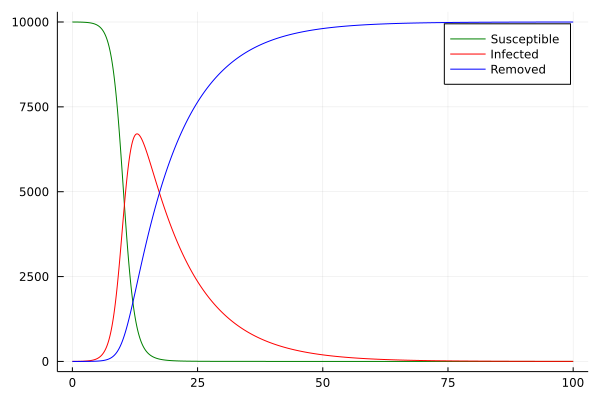

In [5]:
plot(sim1[:,1], sim1[:,2], label = "Susceptible",
        color = "green"
)
plot!(sim1[:,1], sim1[:,3], label = "Infected",
        color = "red"
)
plot!(sim1[:,1], sim1[:,4], label = "Removed",
        color = "blue"
)

# 2. Metoda Rungego-Kutty

In [6]:
using DifferentialEquations

In [7]:
function runge_pandemic!(du,u,p,t)
    du[1] = - beta_r * u[1] * u[2]
    du[2] = beta_r * u[1] * u[2] - gamma_r * u[2]
    du[3] = gamma_r * u[2]
end

runge_pandemic! (generic function with 1 method)

In [8]:
function get_sim_results(sol)
    n = length(sol.t)
    results = zeros(n, 4)
    results[:,1] = sol.t
    for i in 1:n
       results[i,2:4] = sol.u[i]
    end
    results
end

get_sim_results (generic function with 1 method)

In [9]:
beta_r = 0.0001
gamma_r = 0.1
S_0 = 10000
I_0 = 1
R_0 = 0
u0 = [S_0 I_0 R_0]
t_max = 100
steps = 10000;

In [10]:
prob = ODEProblem(runge_pandemic!,u0,(0, t_max))

ODEProblem with uType Matrix{Int64} and tType Int64. In-place: true
timespan: (0, 100)
u0: 1×3 Matrix{Int64}:
 10000  1  0

In [11]:
alg = RK4()

RK4()

In [12]:
sol = solve(prob,alg, saveat= t_max / steps);

In [13]:
sim2 = get_sim_results(sol);

In [14]:
sim2

10001×4 Matrix{Float64}:
   0.0   10000.0       1.0         0.0
   0.01   9999.99      1.00904     0.00100451
   0.02   9999.98      1.01816     0.00201811
   0.03   9999.97      1.02737     0.00304087
   0.04   9999.96      1.03666     0.00407287
   0.05   9999.95      1.04603     0.00511421
   0.06   9999.94      1.05548     0.00616495
   0.07   9999.93      1.06503     0.0072252
   0.08   9999.92      1.07465     0.00829503
   0.09   9999.91      1.08437     0.00937454
   0.1    9999.9       1.09417     0.0104638
   0.11   9999.88      1.10407     0.0115629
   0.12   9999.87      1.11405     0.012672
   ⋮                            
  99.89      0.454745  1.32118  9999.22
  99.9       0.454744  1.31986  9999.23
  99.91      0.454744  1.31854  9999.23
  99.92      0.454743  1.31723  9999.23
  99.93      0.454743  1.31591  9999.23
  99.94      0.454742  1.3146   9999.23
  99.95      0.454741  1.31328  9999.23
  99.96      0.454741  1.31197  9999.23
  99.97      0.45474   1.31066  9999

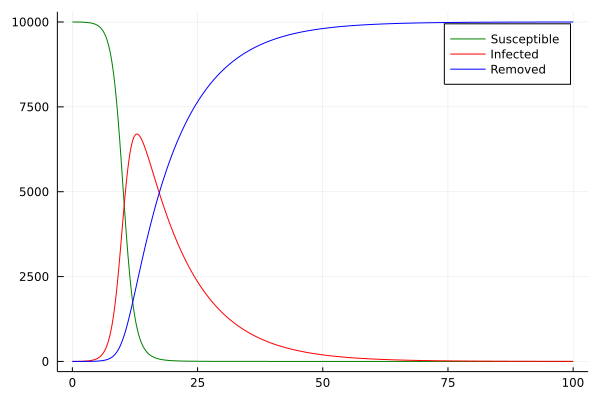

In [15]:
plot(sim2[:,1], sim2[:,2], label = "Susceptible",
        color = "green"
)
plot!(sim2[:,1], sim2[:,3], label = "Infected",
        color = "red"
)
plot!(sim2[:,1], sim2[:,4], label = "Removed",
        color = "blue"
)

# 3. Porownanie metod - roznica w wartosciach

In [16]:
diff_test1 = zeros(size(sim1))
for i in 1:size(diff_test1,1)
    diff_test1[i, 1] = sim1[i , 1] 
    diff_test1[i, 2:4] = sim1[i, 2:4] - sim2[i, 2:4]
end
diff_test1

10001×4 Matrix{Float64}:
   0.0    0.0           0.0           0.0
   0.01   4.51302e-5   -4.06167e-5   -4.51352e-6
   0.02   9.10734e-5   -8.1965e-5    -9.10837e-6
   0.03   0.00013784   -0.000124055  -1.37856e-5
   0.04   0.000185446  -0.0001669    -1.85468e-5
   0.05   0.000233901  -0.000210509  -2.33928e-5
   0.06   0.000283206  -0.000254883  -2.8324e-5
   0.07   0.000333377  -0.000300035  -3.33416e-5
   0.08   0.000384435  -0.000345987  -3.84481e-5
   0.09   0.000436397  -0.000392752  -4.3645e-5
   0.1    0.000489272  -0.000440339  -4.89331e-5
   0.11   0.000543058  -0.000488745  -5.43124e-5
   0.12   0.000597747  -0.000537965  -5.97821e-5
   ⋮                                 
  99.89  -0.00943244   -0.00219582    0.0116283
  99.9   -0.00943242   -0.00219432    0.0116267
  99.91  -0.00943241   -0.00219281    0.0116252
  99.92  -0.0094324    -0.00219131    0.0116237
  99.93  -0.00943238   -0.0021898     0.0116222
  99.94  -0.00943237   -0.00218829    0.0116207
  99.95  -0.00943236 

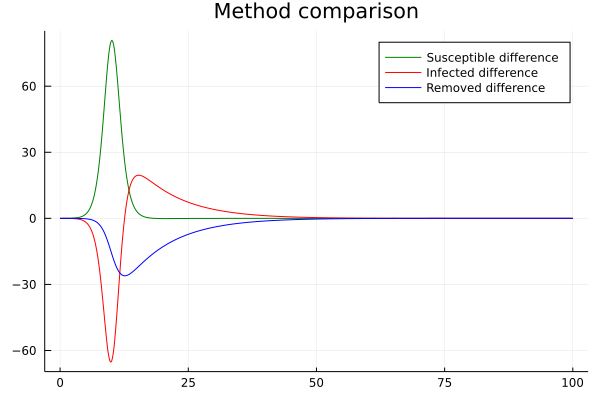

In [17]:
plot(diff_test1[:,1], diff_test1[:,2],
    title = "Method comparison",
    color = "green",
    label = "Susceptible difference"
)
plot!(diff_test1[:,1], diff_test1[:,3],
    color = "red",
    label = "Infected difference"
)
plot!(diff_test1[:,1], diff_test1[:,4],
    color = "blue",
    label = "Removed difference"
)

# 4. Porownanie metod - stabilnosc

In [18]:
function compare_stability(S_0, I_0, R_0, beta, gamma, t_max, step, labels = true)
    steps = trunc(Int, t_max / step)
#     println(steps)
    sim1 = euler_method_pandemic(S_0, I_0, R_0, beta, gamma, t_max, steps)
    
    u0 = [S_0 I_0 R_0]
    beta_r = beta
    gamma_r = gamma
    prob = ODEProblem(runge_pandemic!,u0,(0, t_max))
    alg = RK4()
    sol = solve(prob,alg, saveat= t_max / steps);
    sim2 = get_sim_results(sol);
    
    if labels
        plot(sim1[:,1], sim1[:,2], label = "Euler - Susceptible",
            alpha = 0.4,
            color = "green",
            size = (900, 500)
        )
        plot!(sim1[:,1], sim1[:,3], label = "Euler - Infected",
            alpha = 0.4,
            color = "red"
        )
        plot!(sim1[:,1], sim1[:,4], label = "Euler - Removed",
            alpha = 0.4,
            color = "blue"
        )
        plot!(sim2[:,1], sim2[:,2], label = "RK - Susceptible",
            color = "green"
        )
        plot!(sim2[:,1], sim2[:,3], label = "RK - Infected",
                color = "red"
        )
        plot!(sim2[:,1], sim2[:,4], label = "RK - Removed",
                color = "blue"
        )
    else
        plot(sim1[:,1], sim1[:,2], label = "",
            xlabel = "step: " * string(step),
            alpha = 0.4,
            color = "green",
            size = (900, 500)
        )
        plot!(sim1[:,1], sim1[:,3], label = "",
            alpha = 0.4,
            color = "red"
        )
        plot!(sim1[:,1], sim1[:,4], label = "",
            alpha = 0.4,
            color = "blue"
        )
        plot!(sim2[:,1], sim2[:,2], label = "",
            color = "green"
        )
        plot!(sim2[:,1], sim2[:,3], label = "",
                color = "red"
        )
        plot!(sim2[:,1], sim2[:,4], label = "",
                color = "blue"
        )
    end
    
end

compare_stability (generic function with 2 methods)

In [19]:
beta = 0.0001
gamma = 0.1
S_0 = 10000
I_0 = 1
R_0 = 0
t_max = 100;

krok 0.1

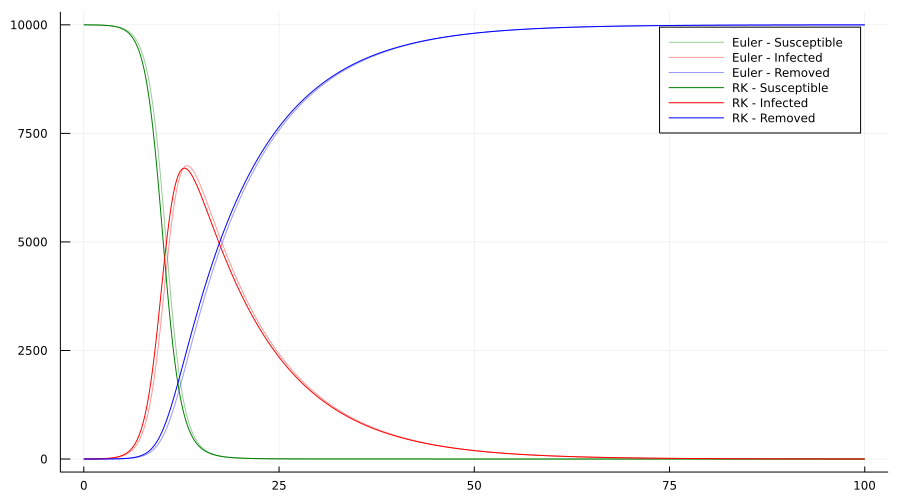

In [20]:
step = 0.1
compare_stability(S_0, I_0, R_0, beta, gamma, t_max, step)

Krok co 0.5

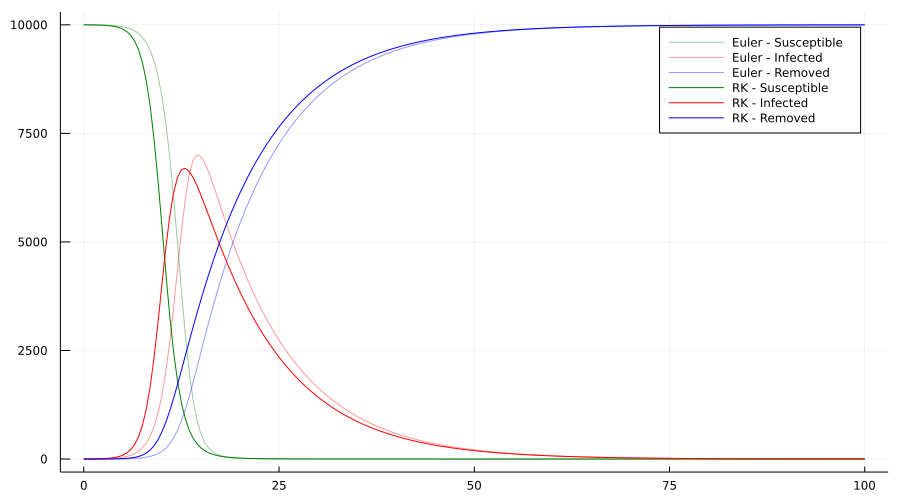

In [21]:
step = 0.5
compare_stability(S_0, I_0, R_0, beta, gamma, t_max, step)

Krok co 1

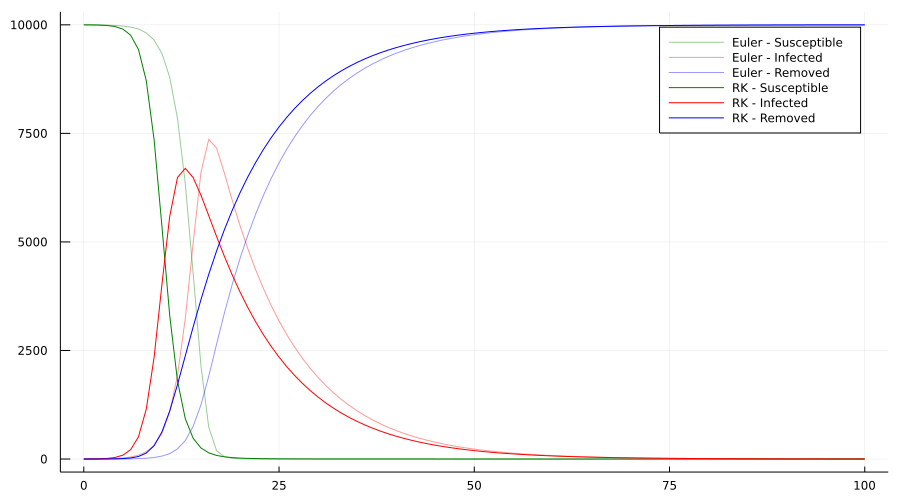

In [22]:
step = 1
compare_stability(S_0, I_0, R_0, beta, gamma, t_max, step)

krok 2

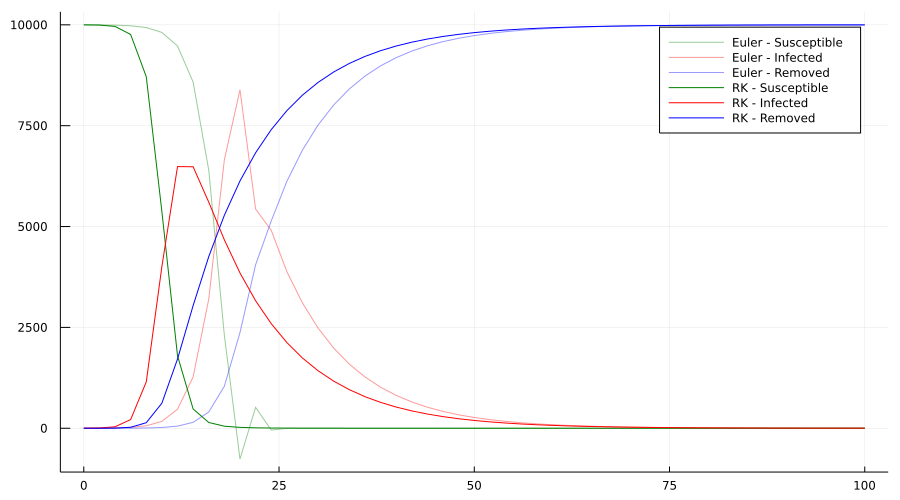

In [23]:
step = 2
compare_stability(S_0, I_0, R_0, beta, gamma, t_max, step)

Krok 3

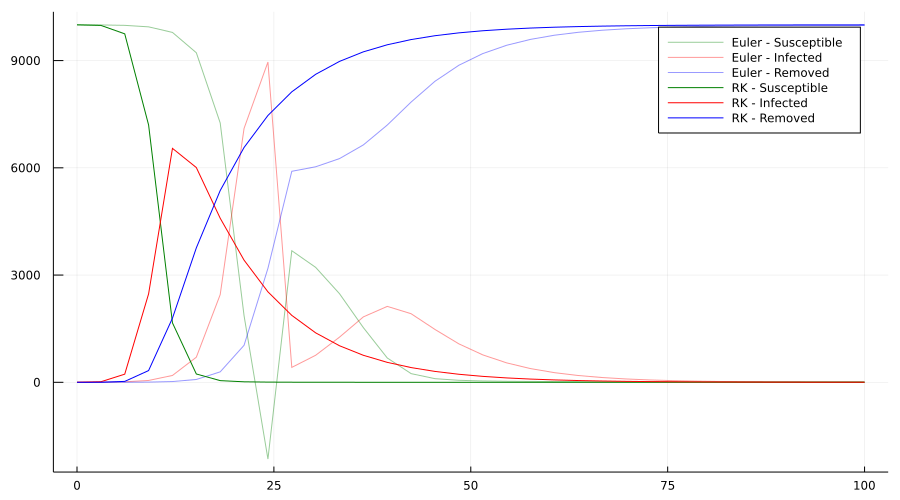

In [24]:
step = 3
compare_stability(S_0, I_0, R_0, beta, gamma, t_max, step)

## Animacja

In [25]:
sim_anim = @animate for i in 0.05:0.01:3.5
    compare_stability(S_0, I_0, R_0, beta, gamma, t_max, i, false)
    end

Animation("/tmp/jl_RsgdMY", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000337.png", "000338.png", "000339.png", "000340.png", "000341.png", "000342.png", "000343.png", "000344.png", "000345.png", "000346.png"])

┌ Info: Saved animation to 
│   fn = /home/wojkly/Documents/STUDIA/mownit/lab9/tmp.gif
└ @ Plots /home/wojkly/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/wojkly/Documents/STUDIA/mownit/lab9/tmp.gif")
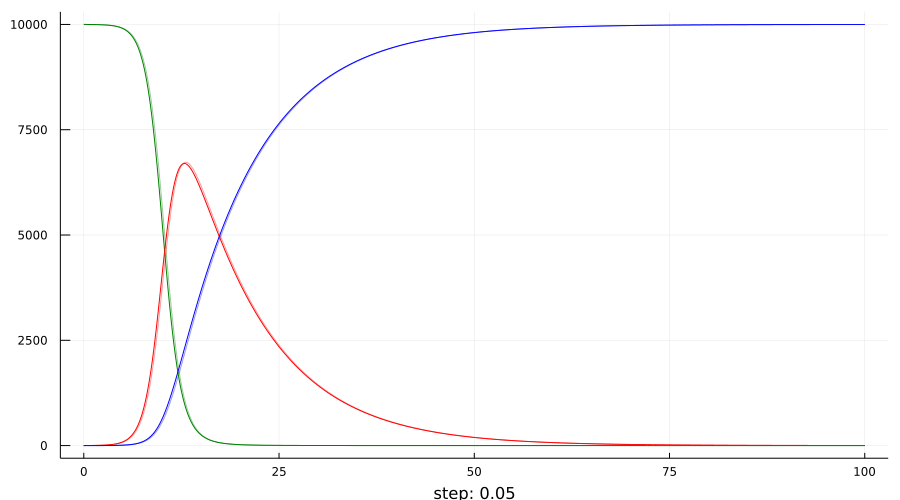

In [26]:
gif(sim_anim, fps = 10)

# 5. Animacja symulacji

In [27]:
function create_animation(S_0, I_0, R_0, beta, gamma, t_max, step, method, title, show_all = true)
    if method == "euler"
        steps = trunc(Int, t_max / step)
#         println(steps)
        sim = euler_method_pandemic(S_0, I_0, R_0, beta, gamma, t_max, steps)
#         println(sim)
    else
        tspan = (0.0,t_max);
        u_0 = [S_0 I_0 R_0]
        beta_r = beta
        gamma_r = gamma
        prob = ODEProblem(runge_pandemic!,u0,tspan)
        sol = solve(prob, alg, saveat=step);
        println("problem solved...")
        sim = get_sim_results(sol)
    end
    
    
    n = size(sim,1)
    max_val = max(S_0,I_0,R_0)
    y_limits = (-0.1*max_val,max_val * 1.1)
    
    sim_anim = @animate for i in 1:10:n
        
        if show_all
            min_idx = 1
        else
            min_idx = max(1, i - 500)
        end
        plot(sim[min_idx:i,1], sim[min_idx:i,2],
            color = "green",
            xlims = (sim[min_idx,1],sim[i,1]),
            ylims = y_limits,
            label = "Susceptible",
            title = title,
            xlabel = "timespan: (0.0,"* string(t_max)*")    step: "*
            string(step) *"\nbeta: "*string(beta)*"   gamma: "*string(gamma)
        )
        plot!(sim[min_idx:i,1], sim[min_idx:i,3],
            color = "red",
            xlims = (sim[min_idx,1],sim[i,1]),
            ylims = y_limits,
            label = "Infected"
        )
        plot!(sim[min_idx:i,1], sim[min_idx:i,4],
            color = "blue",
            xlims = (sim[min_idx,1],sim[i,1]),
            ylims = y_limits,
            label = "Removed"
        )
    end
    sim_anim
end

create_animation (generic function with 2 methods)

In [28]:
beta = 0.0001
gamma = 0.1
S_0 = 10000
I_0 = 1
R_0 = 0
t_max = 100
step = 0.1;

In [29]:
anim = create_animation(S_0, I_0, R_0, beta, gamma, t_max, step, "euler", "Euler animation", true);

┌ Info: Saved animation to 
│   fn = /home/wojkly/Documents/STUDIA/mownit/lab9/tmp.gif
└ @ Plots /home/wojkly/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/wojkly/Documents/STUDIA/mownit/lab9/tmp.gif")
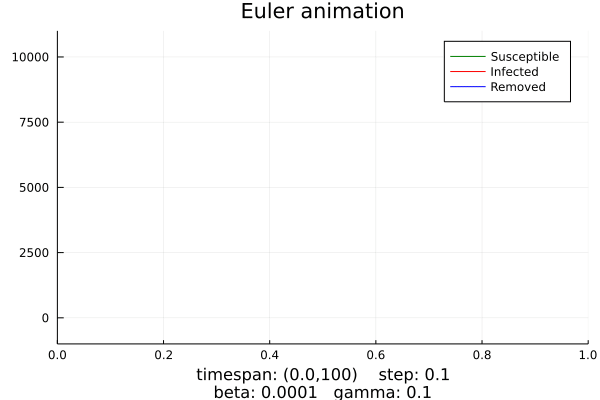

In [30]:
gif(anim, fps = 5)

In [31]:
anim = create_animation(S_0, I_0, R_0, beta, gamma, t_max, step, "rk", "Runge-Kutta animation", true);

problem solved...


┌ Info: Saved animation to 
│   fn = /home/wojkly/Documents/STUDIA/mownit/lab9/tmp.gif
└ @ Plots /home/wojkly/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/wojkly/Documents/STUDIA/mownit/lab9/tmp.gif")
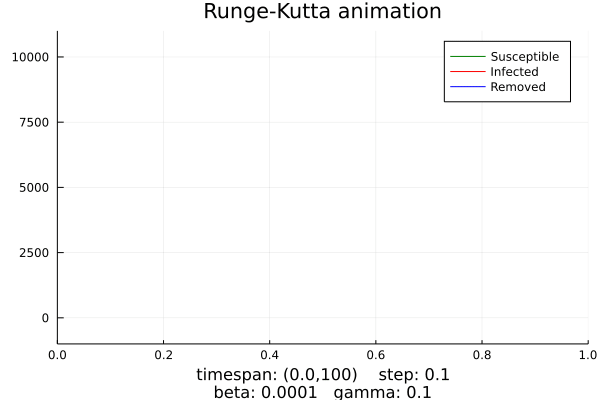

In [32]:
gif(anim, fps = 5)